In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.drop(columns = ['id'])

df = df.dropna()
df.head()
df.isna().sum()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
y = df['stroke']

label = df.drop(columns = ['stroke'])

In [24]:
sc = StandardScaler()
scaled = sc.fit_transform(df[["age", "avg_glucose_level", 'bmi']])

scaled_df = pd.DataFrame(scaled, columns = ["age", "avg_glucose_level", 'bmi'])


In [25]:
df_dummies = pd.get_dummies(df[['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status' ]])
df_dummies.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [26]:
binary_df = df[['hypertension', 'heart_disease', 'stroke']]
binary_df.head()

,hypertension,heart_disease,stroke
0,0,1,1
2,0,1,1
3,0,0,1
4,1,0,1
5,0,0,1


In [27]:
combined_df = pd.concat([scaled_df, df_dummies, binary_df], axis = 1)
combined_df.head()
combined_df = combined_df.dropna()

In [28]:
y = combined_df['stroke']


X = combined_df.drop(columns = ['stroke'])


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
X_train, X_test, y_train, y_test

(           age  avg_glucose_level       bmi  gender_Female  gender_Male  \
 3346 -0.703476           0.159948  0.612072            1.0          0.0   
 1883 -1.102540           0.178633 -0.508481            1.0          0.0   
 4882 -0.614796          -0.332850 -0.113741            1.0          0.0   
 3228 -1.412922          -0.399937 -0.572149            0.0          1.0   
 363   1.557882          -0.790079 -0.521215            1.0          0.0   
 ...        ...                ...       ...            ...          ...   
 3036 -0.836497          -0.381027 -1.119692            0.0          1.0   
 2899 -0.880838          -0.000566 -0.228343            0.0          1.0   
 962  -1.013859          -0.101197 -0.266543            0.0          1.0   
 4157  0.094650          -0.226591  1.439753            1.0          0.0   
 275   0.626734          -0.970404  0.268266            1.0          0.0   
 
       gender_Other  ever_married_No  ever_married_Yes  work_type_Govt_job  \
 3346   

In [14]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
cols = ['age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'hypertension', 'heart_disease']

X_train_std = pd.DataFrame(X_train_std, columns=cols)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train_std, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [22]:
import numpy as np
 
importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = combined_df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


 1) bmi                            0.250953
 2) avg_glucose_level              0.242543
 3) gender_Female                  0.214768
 4) heart_disease                  0.034640
 5) stroke                         0.032645
 6) work_type_Self-employed        0.021464
 7) smoking_status_smokes          0.020268
 8) Residence_type_Urban           0.018964
 9) gender_Male                    0.018604
10) smoking_status_Unknown         0.018461
11) gender_Other                   0.018434
12) smoking_status_never smoked    0.018161
13) work_type_children             0.018093
14) hypertension                   0.017595
15) work_type_Never_worked         0.015973
16) smoking_status_formerly smoked 0.013425
17) ever_married_Yes               0.011769
18) work_type_Govt_job             0.010821
19) Residence_type_Rural           0.002323
20) work_type_Private              0.000096
21) ever_married_No                0.000001


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [16]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
rf.feature_importances_

array([0.26318069, 0.32772417, 0.3000314 , 0.01131615, 0.01080381,
       0.01740713, 0.02045449, 0.01651414, 0.01950062, 0.01306739])

In [33]:
label.columns

feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

<BarContainer object of 10 artists>

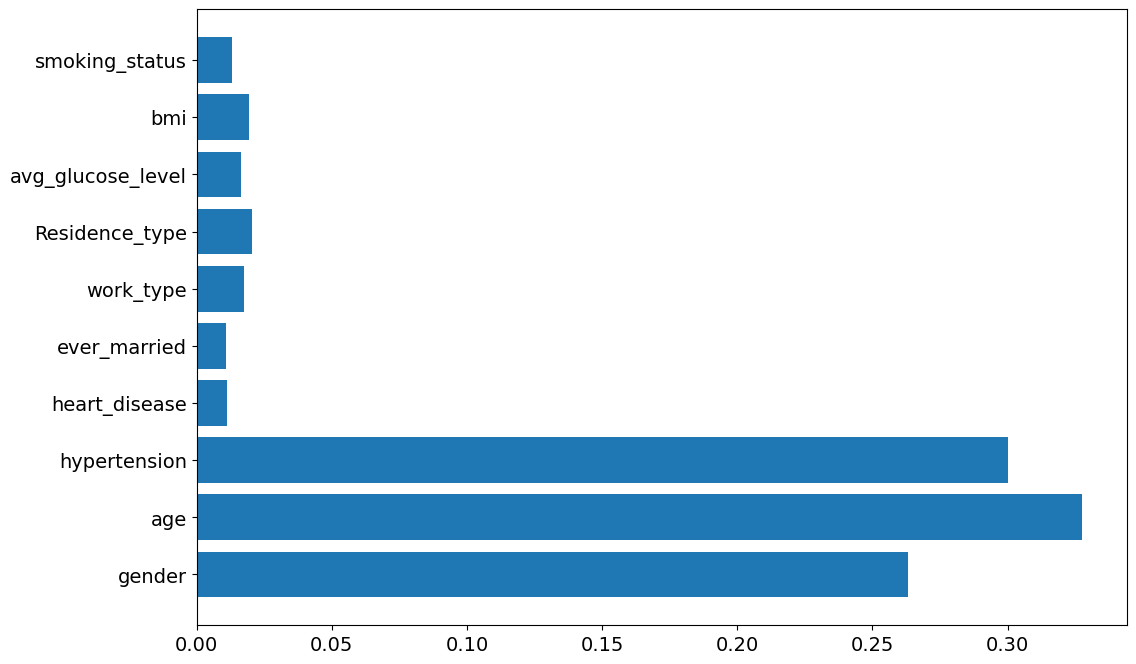

In [34]:

plt.barh(feature_names, rf.feature_importances_)